In [252]:
### ml
## 기본 패키지
import numpy  as np
import pandas as pd
import sklearn
print('numpy  version - ' , np.__version__) 
print('pandas version - ' , pd.__version__) 
print('sklearn version - ' , sklearn.__version__)

## 데이터셋
import seaborn as sns
from   sklearn.datasets import load_iris, load_breast_cancer

## 전처리
from sklearn.impute import SimpleImputer
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from io import StringIO

# 문턱을 이용한 처리
from sklearn.preprocessing import Binarizer

# 결측치 시각화
import missingno as msno

## 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, KFold , StratifiedKFold , cross_val_score, cross_validate, GridSearchCV 
from sklearn.tree            import DecisionTreeClassifier

## 평가지표
# 분류
from sklearn.metrics         import accuracy_score 
from sklearn.metrics         import recall_score, precision_score, f1_score, confusion_matrix, make_scorer, precision_recall_curve

# 예측
from sklearn.metrics         import mean_squared_error, mean_absolute_error

## 시각화
import matplotlib.pyplot as plt
%matplotlib inline

numpy  version -  1.20.3
pandas version -  1.3.4
sklearn version -  0.24.2


### Regression(회귀)
- 회귀란 종속변수(target)와 하나이상의 독립변수(feature)간의 관계를 모델링하는 선형 또는 비선형 접근법
- 예측이고 예측을 위해서는 종속변수의 타입은 연속된 숫자이여야 한다
- 회귀분석은 데이터 값이 평균과 괕은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.
- Y = (w * x) + b
- w : weight, b = bias
- cost(w,b) - 업데이트를 토앻서 예측값과 실제값의 차이를 계산
- 회귀계수 : coefficioents -> 독립변수가 종속변수에 미치는 영향의 강도
- 회귀유형 : 독립변수 1개이면 단일회귀 - 선형회귀
-            독립변수 여러개이면 다중회귀 - 비선형회귀

In [2]:
print('단일회귀 - \n')

frm = pd.DataFrame({
    'height' : [1.47, 1.58, 2.34, 6.57, 8.34, 8.83, 9.42],
    'mass'   : [2.30, 3.14, 4.32, 4.76, 8.11, 8.84, 9.51]
})


단일회귀 - 



In [20]:
print('독립변수 또는 설명변수 - \n')
print(type(frm.height), frm.height.shape)
x = frm[['height']]

독립변수 또는 설명변수 - 

<class 'pandas.core.series.Series'> (7,)


In [21]:
print('종속변수 - \n')
print(type(frm.mass), frm.mass.shape)
y = frm[['mass']]
y.shape

종속변수 - 

<class 'pandas.core.series.Series'> (7,)


(7, 1)

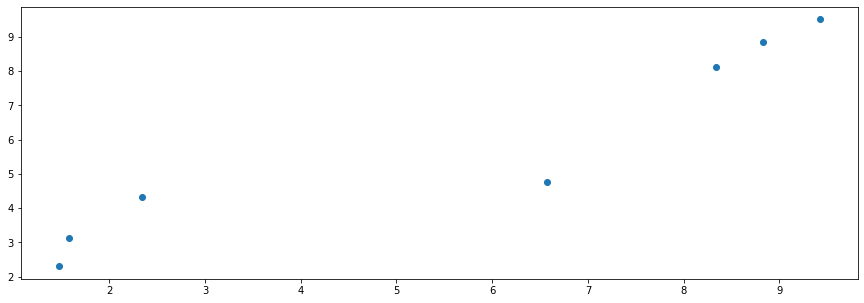

In [7]:
plt.figure(figsize=(15,5))
plt.plot(x,y,'o')
plt.show()
plt.close()

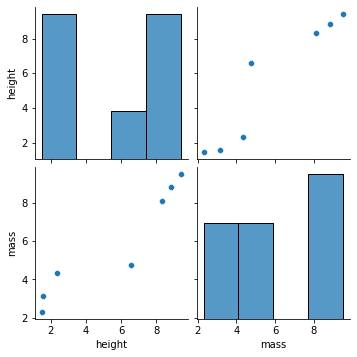

In [10]:
sns.pairplot(frm)
plt.show()
plt.close()

In [12]:
linear_model = LinearRegression()

In [38]:
linear_model.fit(x, y)
user_pred = linear_model.predict(x)
# type(user_pred)
# type(np.array(y))

for i in zip(user_pred, np.array(y)):
    print(i)

(array([2.75449793]), array([2.3]))
(array([2.83895782]), array([3.14]))
(array([3.4224989]), array([4.32]))
(array([6.67036573]), array([4.76]))
(array([8.0294022]), array([8.11]))
(array([8.40563263]), array([8.84]))
(array([8.85864479]), array([9.51]))


In [33]:
print('w = 기울기 : \n', linear_model.coef_)
print('b = 절편 : \n', linear_model.intercept_)


w = 기울기 : 
 [[0.76781722]]
b = 절편 : 
 [1.62580662]


In [39]:
print('R - squared(결정계수) - \n')
print('R = ',linear_model.score(x,y))

R - squared(결정계수) - 

R =  0.8945058048949444


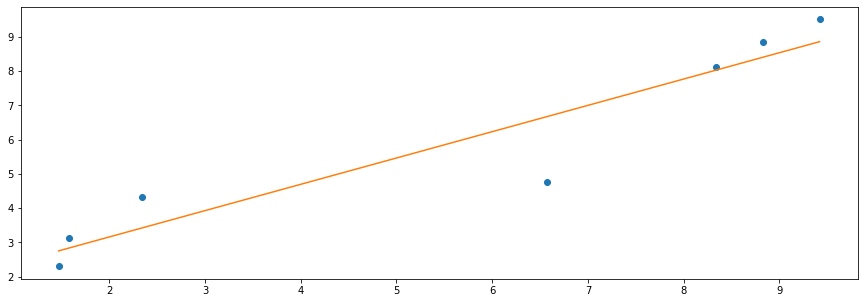

In [40]:
plt.figure(figsize=(15,5))
plt.plot(x,y,'o')
plt.plot(x,user_pred,'-')

plt.show()
plt.close()

In [84]:
mpg_frm = pd.read_csv('./lecture_file/auto-mpg.csv',header=None)
mpg_frm

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [96]:
mpg_frm.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acc', 'model year', 'origin', 'name']
mpg_frm.horsepower.unique()
mpg_frm

,mpg,cylinders,displacement,horsepower,weight,acc,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [109]:
mpg_frm.replace('?', np.NaN, inplace=True)
# mpg_frm.horspower.unique()
mpg_frm.dropna(subset=['horsepower'], axis = 0, inplace=True)
mpg_frm['horsepower'] = mpg_frm['horsepower'].astype(float)
le = LabelEncoder()
le_name= le.fit_transform(mpg_frm.iloc[:,8])

In [110]:
print('다중회귀 - ')
mpg_subset_frm = mpg_frm.loc[:, ['mpg', 'cylinders', 'horsepower', 'weight']]

다중회귀 - 


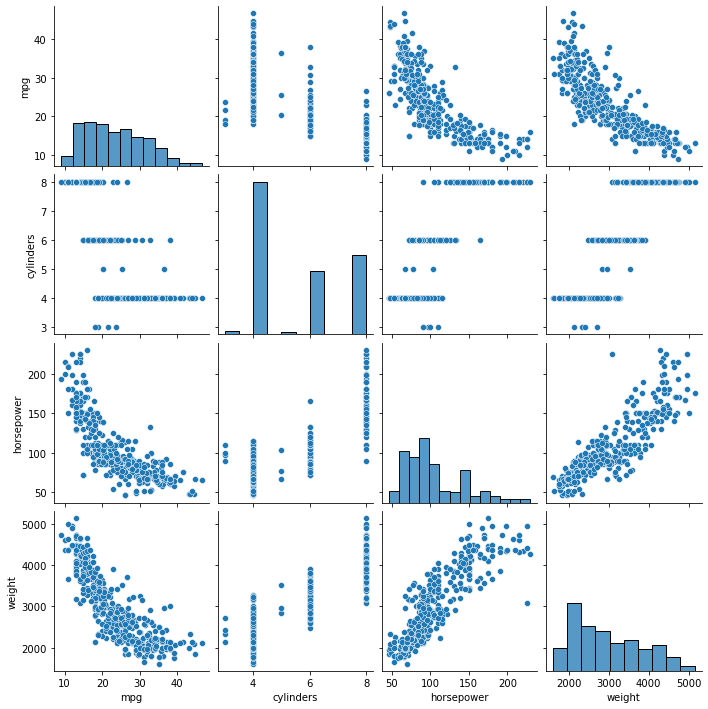

In [111]:
sns.pairplot(mpg_subset_frm)
plt.show()
plt.close()

In [113]:
print('종속변수 독립변수 분리 - ')
print('종속변수 - ')
y = mpg_subset_frm['mpg']

print('독립변수 - ')
x = mpg_subset_frm[['cylinders', 'horsepower', 'weight']]

종속변수 독립변수 분리 - 
종속변수 - 
독립변수 - 


In [116]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state= 200)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((313, 3), (79, 3), (313,), (79,))

In [121]:
mpg_linear_model = LinearRegression()
mpg_linear_model.fit(train_x, train_y)
print('w = 기울기 : \n', mpg_linear_model.coef_)
print('b = 절편 : \n', mpg_linear_model.intercept_)

print('모델의 신뢰도 - score')
print('r2 : \n', mpg_linear_model.score(test_x, test_y))

w = 기울기 : 
 [-0.22120285 -0.04519504 -0.00545691]
b = 절편 : 
 45.60264011668325
모델의 신뢰도 - score
r2 : 
 0.7126685040232241


In [122]:
print('예측 - ')
mpg_pred = mpg_linear_model.predict(test_x)

예측 - 


In [125]:
regression_actual_guess = pd.DataFrame({
    'actual' : test_y,
    'guess'  : mpg_pred
})

regression_actual_guess

,actual,guess
269,30.9,29.159301
276,21.6,24.268347
51,30.0,30.236553
381,36.0,29.295723
93,14.0,13.932851
...,...,...
249,19.9,20.499075
248,36.1,32.183696
104,12.0,9.513865
63,14.0,11.995353


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


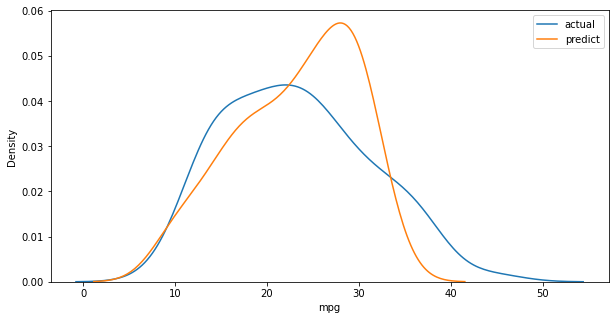

In [127]:
plt.figure(figsize=(10,5))

ax1 = sns.distplot(test_y, hist= False, label='actual')
ax2 = sns.distplot(mpg_pred, hist=False, label = 'predict')

plt.legend()
plt.show()
plt.close()

In [134]:
df = pd.read_csv('./lecture_file/manhattan.csv')
df.head(3)
df.drop(['rental_id', 'neighborhood', 'borough'], axis = 1, inplace=True)

In [143]:
x, y = df.iloc[:,1:14], df.iloc[:,0]

상관관계 분석을 위한 시각화 - 



IndexError: index 3 is out of bounds for axis 0 with size 3

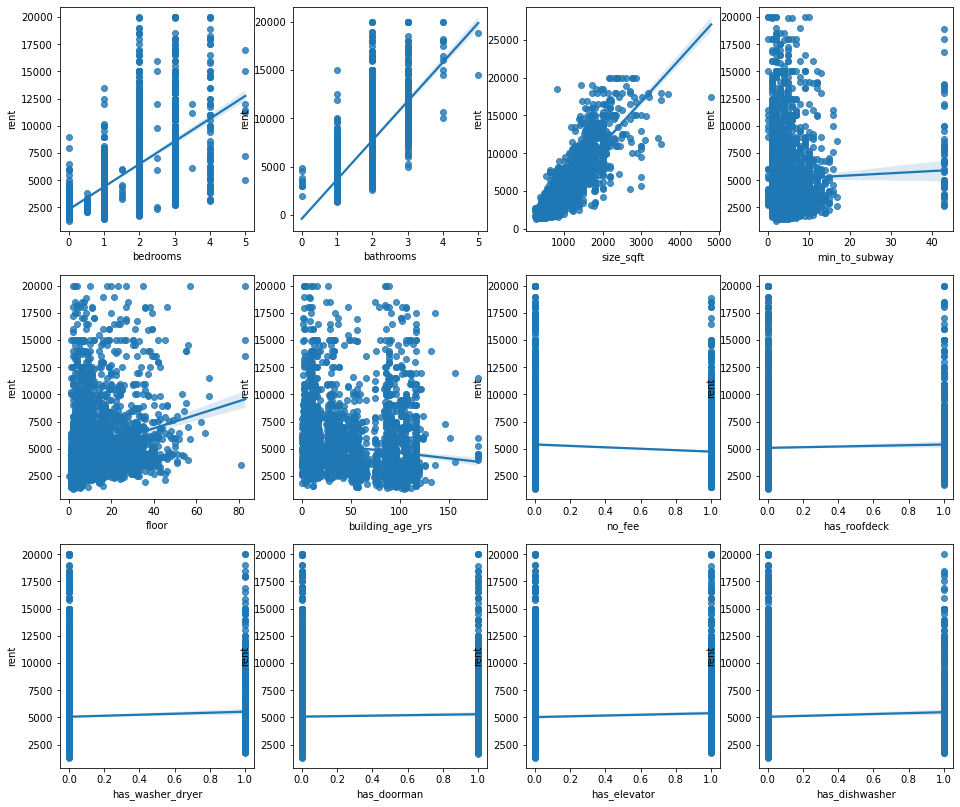

In [147]:
print('상관관계 분석을 위한 시각화 - ')
print()

fig, axs = plt.subplots(figsize = (16,14), ncols=4, nrows=3)

for idx, feature in enumerate(x):
    row = int(idx/4)
    col = idx % 4
    sns.regplot(x= feature, y = 'rent', data = df, ax = axs[row][col])

### practice

In [189]:
print('1. 데이터세트 분리')
print('2. 모델생성 및 학습')
print('3. 기울기, 절편 확인')
print('4. 모델의 신뢰도(결정계수 확인)')
print('5. 사용자의 데이터를 넣어서 가격 예측')
print('6. 실제 임대료, 예측 임대료 프레임 구축')
print('7. scatter 이용해서 실제 임대료, 예측 임대료 분포를 확인!!!')

1. 데이터세트 분리
2. 모델생성 및 학습
3. 기울기, 절편 확인
4. 모델의 신뢰도(결정계수 확인)
5. 사용자의 데이터를 넣어서 가격 예측
6. 실제 임대료, 예측 임대료 프레임 구축
7. scatter 이용해서 실제 임대료, 예측 임대료 분포를 확인!!!


In [190]:
print('1. 데이터세트 분리')
train_x, test_x, train_y, test_y = train_test_split(df.iloc[:,1:14], df.iloc[:,0],
                                                   random_state= 200)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

1. 데이터세트 분리


((2654, 13), (885, 13), (2654,), (885,))

In [199]:
print('2. 모델생성 및 학습')
linear_regression_model = LinearRegression()
linear_regression_model.fit(train_x, train_y)

2. 모델생성 및 학습


LinearRegression()

In [200]:
print('3. 기울기, 절편 확인')
print('기울기 : {} , 절편 : {}'.format(linear_regression_model.coef_,
                                 linear_regression_model.intercept_))

3. 기울기, 절편 확인
기울기 : [-295.82173808 1103.30006646    4.95603985  -14.9729741    22.13133981
   -7.39540081  -89.93041538  -26.0403715    81.0902372  -196.0048529
  142.21537992   -3.44535644  -89.87056996] , 절편 : -402.8007735557703


In [193]:
print('4. 모델의 신뢰도(결정계수 확인)')
print('결정 계수 : ', linear_regression_model.score(train_x, train_y))

4. 모델의 신뢰도(결정계수 확인)
결정 계수 :  0.7798338842319191


In [194]:
print('5. 사용자의 데이터를 넣어서 가격 예측')
y_pred = linear_regression_model.predict(test_x)

5. 사용자의 데이터를 넣어서 가격 예측


In [201]:
print('6. 실제 임대료, 예측 임대료 프레임 구축')
df_result = pd.DataFrame({'actual' : test_y, 'pred' : y_pred})


6. 실제 임대료, 예측 임대료 프레임 구축


7. scatter 이용해서 실제 임대료, 예측 임대료 분포를 확인!!!


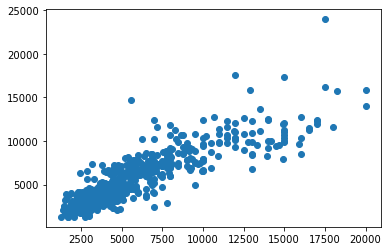

In [208]:
print('7. scatter 이용해서 실제 임대료, 예측 임대료 분포를 확인!!!')
plt.scatter(df_result.actual, df_result.pred)


7. scatter 이용해서 실제 임대료, 예측 임대료 분포를 확인!!!


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='actual', ylabel='pred'>

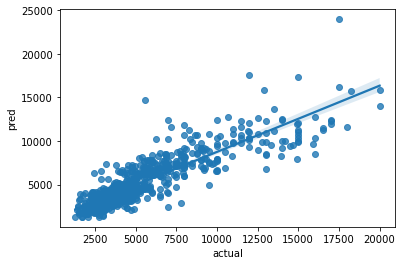

In [209]:
print('8. scatter에 회귀선 그리기')
sns.regplot(df_result.actual, df_result.pred, fit_reg= True)

#### 성능 지표

In [213]:
iris = load_iris()
print(type(iris))
print(iris.keys())
print(iris.target_names)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']


In [228]:
print('독립 변수 - ')
x = pd.DataFrame(iris.data, columns=iris.feature_names)

print('종속 변수 - ')
y = pd.DataFrame(iris.target, columns=['species'])

독립 변수 - 
종속 변수 - 


,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


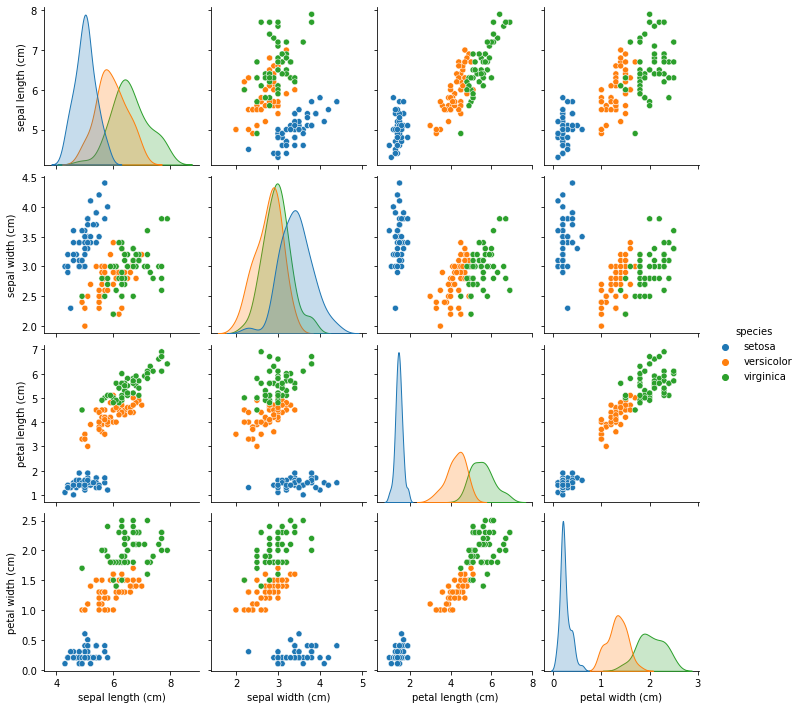

In [233]:
y['species'] = y['species'].replace([0,1,2], ['setosa', 'versicolor', 'virginica'])
iris_frm = pd.concat([x,y], axis=1)
iris_frm

sns.pairplot(iris_frm, hue='species')

In [235]:
iris_frm['species'] = iris_frm['species'].replace(['setosa', 'versicolor', 'virginica'], [0,1,2])

iris_frm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [237]:
print('종속 변수 - ')
y= iris_frm['sepal length (cm)']

print('독립 변수 - ')
x = iris_frm.drop('sepal length (cm)', axis=1)

종속 변수 - 
독립 변수 - 


In [238]:
iris_model = LinearRegression()
iris_model.fit(x,y)

LinearRegression()

In [240]:
r_squared = iris_model.score(x,y)
r_squared

0.8621931701975808

In [244]:
user_pred = iris_model.predict([[3.4, 2.8, 0.4, 1]])

user_pred

array([5.66918708])

In [246]:
train_x, test_x, train_y, test_y = train_test_split(x, y,
                                                   random_state= 200)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((112, 4), (38, 4), (112,), (38,))

In [247]:
iris_model = LinearRegression()
iris_model.fit(train_x, train_y)

LinearRegression()

In [248]:
r_squared = iris_model.score(train_x, train_y)
r_squared

0.854444119239324

In [251]:
y_pred = iris_model.predict(test_x)

regression_actual_guess = pd.DataFrame({
    'actual' : test_y,
    'guess'  : y_pred
})

regression_actual_guess.head(5)

,actual,guess
84,5.4,6.270152
122,7.7,7.353520
28,5.2,4.946766
24,4.8,5.337509
75,6.6,6.233534


In [254]:
print('성능평가 지표 - \n')
print('mae - ', mean_absolute_error(test_y, y_pred))  #  과대적합인지 과소적합인지 판단이 어려움
print('mse - ', mean_squared_error(test_y, y_pred))
print('rmse - ', np.sqrt(mean_squared_error(test_y, y_pred)))
print('r2 - ', iris_model.score(test_x, test_y))


성능평가 지표 - 

mae -  0.2218728452469627
mse -  0.0907195358540479
rmse -  0.3011968390505583
r2 -  0.8672217618353485
